In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, auc,\
confusion_matrix, classification_report, roc_auc_score, roc_curve, cohen_kappa_score, precision_recall_curve


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('X_train_scaled_v3.csv', index_col=0)
X_test = pd.read_csv('X_test_scaled_v3.csv', index_col=0)
y_train = pd.read_csv('y_train_v3.csv', index_col=0)
y_test = pd.read_csv('y_test_v3.csv', index_col=0) 

In [3]:
def plot_roc_curve(algorithm_name, model):
    plt.figure(figsize = (12, 7))
    y_pred_proba = model.predict_proba(X_test)
    roc_score = roc_auc_score(y_test, y_pred_proba[:, 1], average = 'weighted')
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
    plt.plot(fpr, tpr, label = 'ROC score: {}'.format(round(roc_score,4)))
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('FPR (1-Specificity)')
    plt.ylabel('TPR (Sensitivity)')
    plt.legend()
    plt.grid()
    plt.title("ROC AUC Curve for {} model".format(algorithm_name))
    plt.show()
    
def plot_precision_recall_curve(algorithm_name, model):
    plt.figure(figsize = (12, 7))
    y_pred_proba = model.predict_proba(X_test)
    y_pred = model.predict(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
    prec_score = auc(recall, precision)
    plt.plot(recall, precision, label = 'AUC PR score: {}'.format(round(prec_score,4)))
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.title("Precision-Recall Curve for {} model".format(algorithm_name))
    plt.show()    

def plot_confusion_matrix(algorithm_name, model):
    y_pred = model.predict(X_test)
    cm = pd.DataFrame(data = confusion_matrix(y_test, y_pred), index = ['Actual:0', 'Actual:1'], 
             columns = ['Predicted:0', 'Predicted:1'])
    plt.figure(figsize = (5,5))
    sns.heatmap(cm, cbar = False, annot = True, fmt = '.2f',\
                cmap = ListedColormap('Thistle'), linewidths=0.2, linecolor='white')
    plt.title("Confusion matrix for {} model".format(algorithm_name))
    plt.show()
    
def plot_classification_report(algorithm_name, model):
    print("Classification report for {} model:".format(algorithm_name))
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
def plot_feature_importance(algorithm_name, model):
    plt.figure(figsize = (20, 12))
    feat_imp = pd.DataFrame(model.feature_importances_, index = X_test.columns, columns = ['Importance'])
    feat_imp = feat_imp.sort_values(by = "Importance", ascending=False)
    sns.barplot(x = feat_imp['Importance'], y = feat_imp.index )
    plt.title("Feature importance according to {} model".format(algorithm_name))
    plt.show()

score_card = pd.DataFrame(columns = ['model', 'train score', 'test score', 'precision', 'recall',\
                                     'f1_score', 'kappa score', 'auc-pr score','roc_score'])
def update_score_card(algorithm_name, model):
    global score_card
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    score_card = score_card.append({
        'model': algorithm_name, 
        'train score': model.score(X_train, y_train), 
        'test score': model.score(X_test, y_test), 
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1_score': f1_score(y_test, y_pred, average='weighted'), 
        'kappa score': cohen_kappa_score(y_test, y_pred), 
        'auc-pr score': auc(recall, precision),
        'roc_score':roc_auc_score(y_test, y_pred_proba, average='weighted')}, 
    ignore_index = True)
    
    return score_card

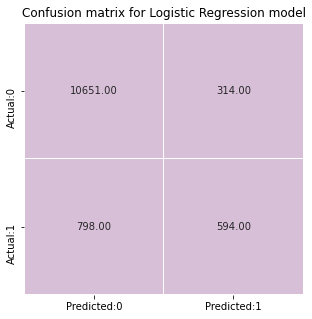

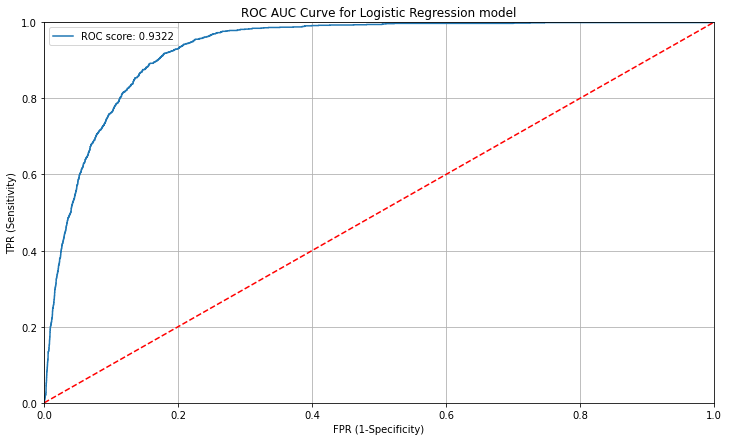

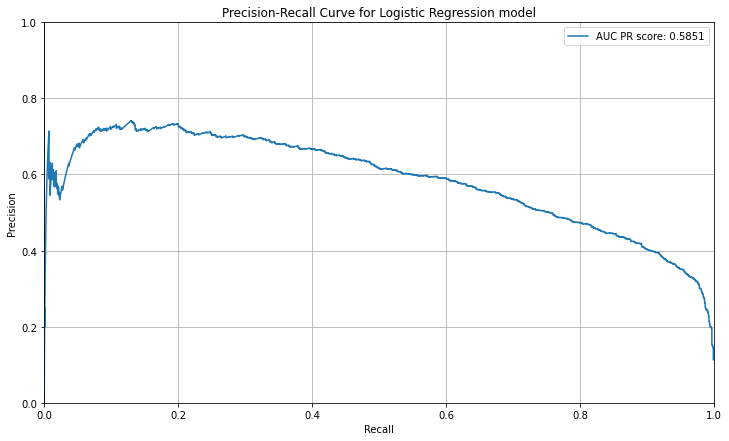

Classification report for Logistic Regression model:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10965
           1       0.65      0.43      0.52      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.70      0.73     12357
weighted avg       0.90      0.91      0.90     12357



,model,train score,test score,precision,recall,f1_score,kappa score,auc-pr score,roc_score
0,Logistic Regression,0.91249,0.910011,0.899196,0.910011,0.901514,0.469321,0.585107,0.932169


In [4]:
# Logistic Regression
logreg = LogisticRegression()
logreg_model = logreg.fit(X_train, y_train)
plot_confusion_matrix('Logistic Regression', logreg_model)
plot_roc_curve('Logistic Regression', logreg_model)
plot_precision_recall_curve('Logistic Regression', logreg_model)
plot_classification_report('Logistic Regression', logreg_model)
# plot_feature_importance('Logistic Regression', logreg_model)
update_score_card('Logistic Regression', logreg_model)

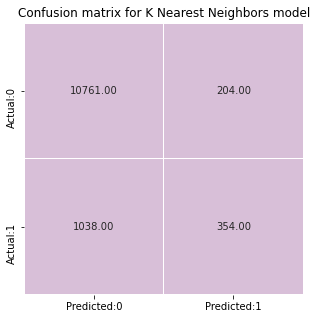

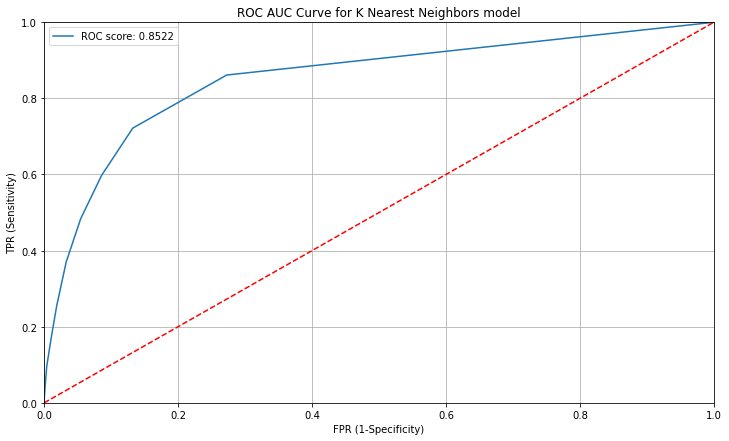

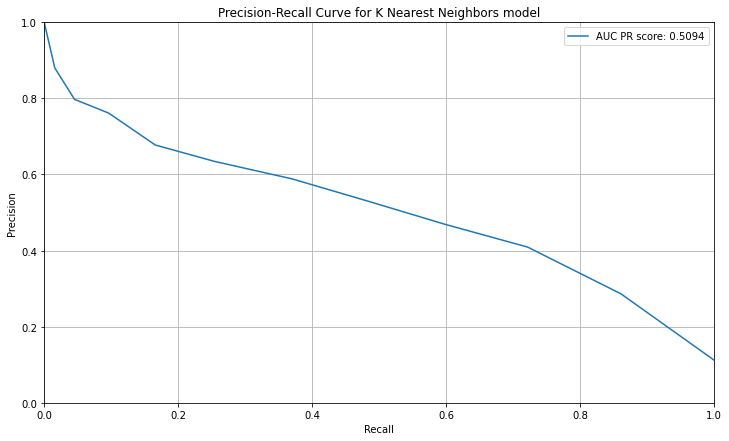

Classification report for K Nearest Neighbors model:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10965
           1       0.63      0.25      0.36      1392

    accuracy                           0.90     12357
   macro avg       0.77      0.62      0.65     12357
weighted avg       0.88      0.90      0.88     12357



,model,train score,test score,precision,recall,f1_score,kappa score,auc-pr score,roc_score
0,Logistic Regression,0.912490,0.910011,0.899196,0.910011,0.901514,0.469321,0.585107,0.932169
1,K Nearest Neighbors,0.910513,0.899490,0.880753,0.899490,0.879838,0.319185,0.509423,0.852179


In [5]:
# KNearestneighbours
kneighbors = KNeighborsClassifier(n_neighbors= 10)
kneighbors_model = kneighbors.fit(X_train, y_train)
plot_confusion_matrix('K Nearest Neighbors', kneighbors_model)
plot_roc_curve('K Nearest Neighbors', kneighbors_model)
plot_precision_recall_curve('K Nearest Neighbors', kneighbors_model)
plot_classification_report('K Nearest Neighbors', kneighbors_model)
update_score_card('K Nearest Neighbors', kneighbors_model)

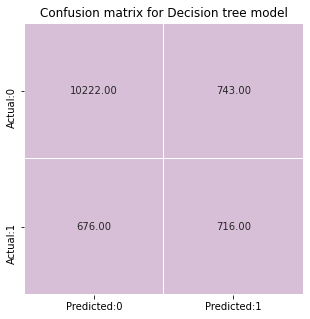

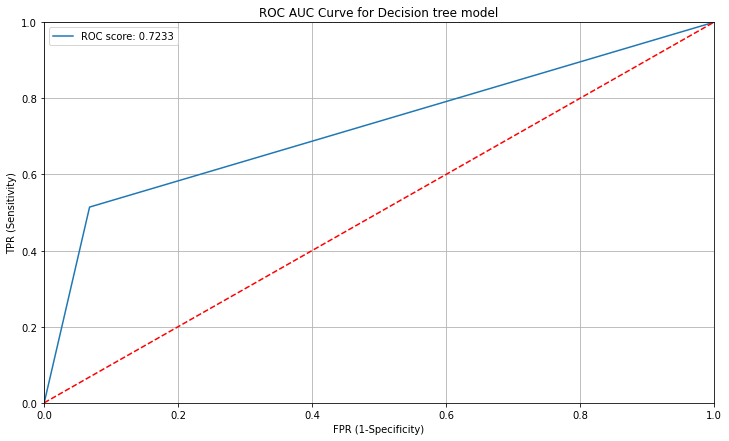

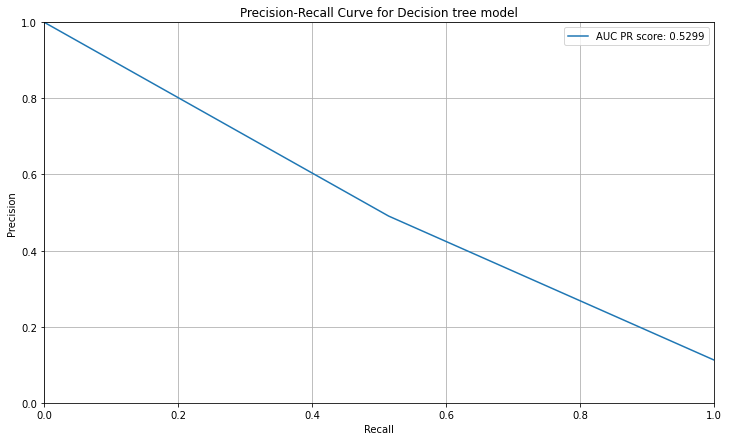

Classification report for Decision tree model:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10965
           1       0.49      0.51      0.50      1392

    accuracy                           0.89     12357
   macro avg       0.71      0.72      0.72     12357
weighted avg       0.89      0.89      0.89     12357



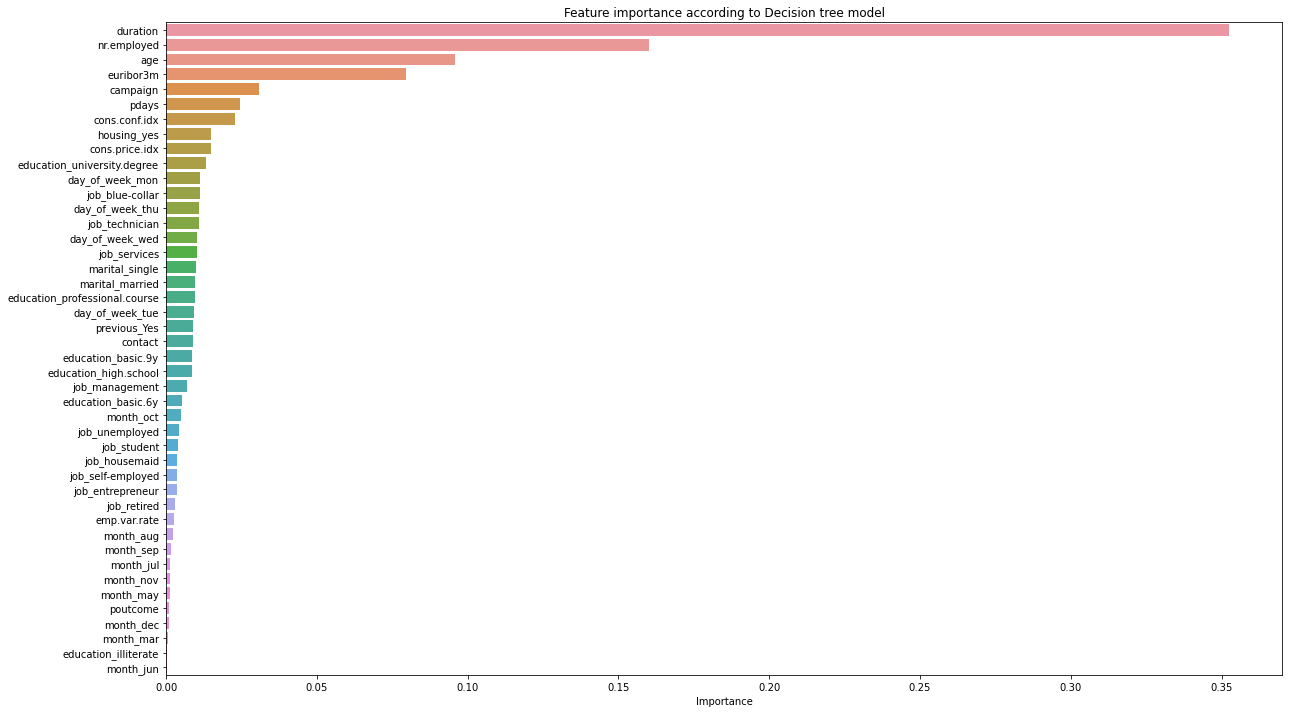

,model,train score,test score,precision,recall,f1_score,kappa score,auc-pr score,roc_score
0,Logistic Regression,0.912490,0.910011,0.899196,0.910011,0.901514,0.469321,0.585107,0.932169
1,K Nearest Neighbors,0.910513,0.899490,0.880753,0.899490,0.879838,0.319185,0.509423,0.852179
2,Decision tree,1.000000,0.885166,0.887591,0.885166,0.886340,0.437416,0.529910,0.723303


In [6]:
# Decision tree
dtree = DecisionTreeClassifier()
dtree_model = dtree.fit(X_train, y_train)
plot_confusion_matrix('Decision tree', dtree_model)
plot_roc_curve('Decision tree', dtree_model)
plot_precision_recall_curve('Decision tree', dtree_model)
plot_classification_report('Decision tree', dtree_model)
plot_feature_importance('Decision tree', dtree_model)
update_score_card('Decision tree', dtree_model)

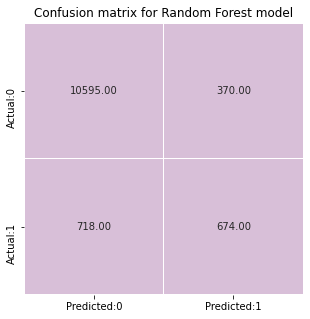

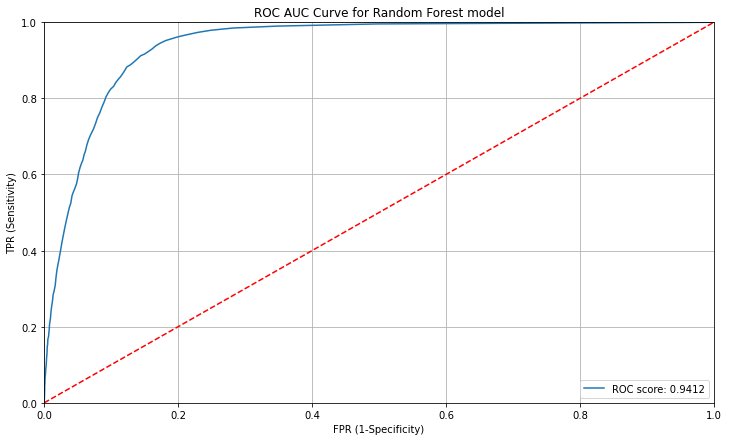

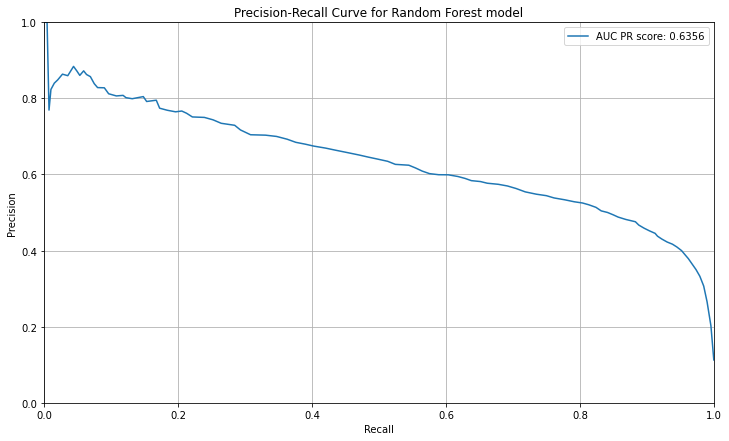

Classification report for Random Forest model:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10965
           1       0.65      0.48      0.55      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.73      0.75     12357
weighted avg       0.90      0.91      0.91     12357



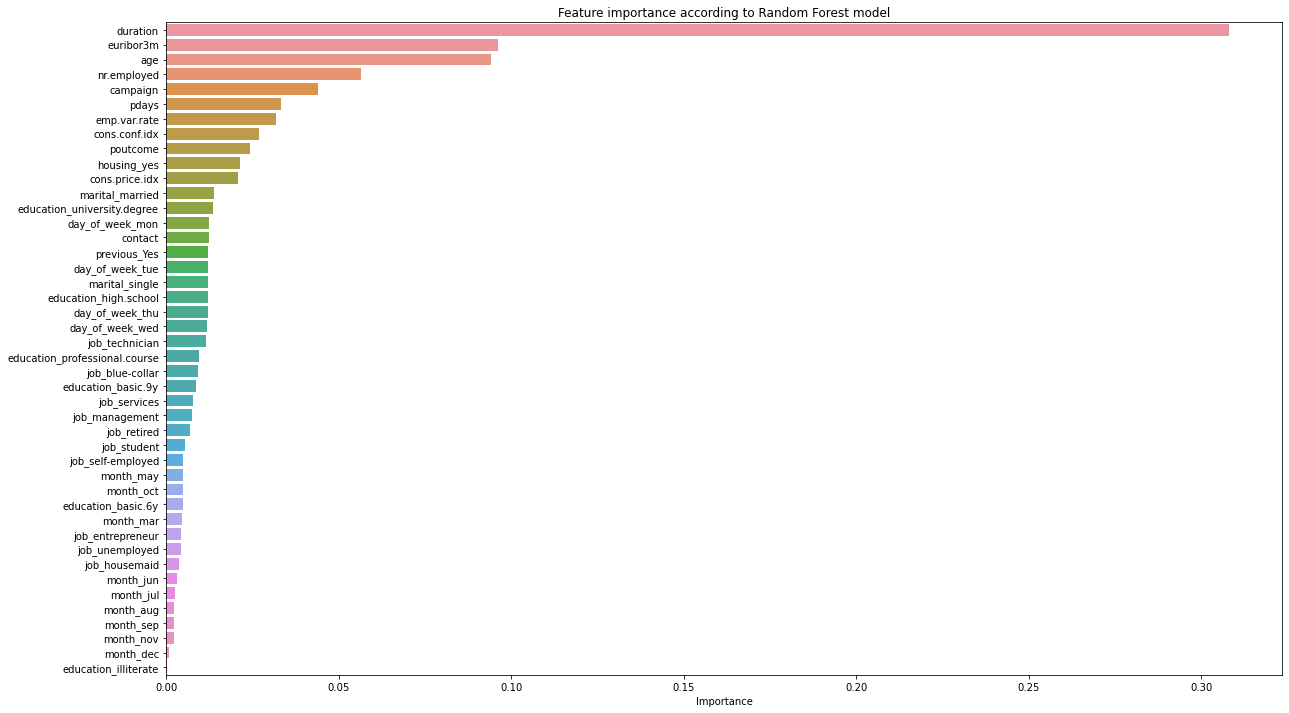

,model,train score,test score,precision,recall,f1_score,kappa score,auc-pr score,roc_score
0,Logistic Regression,0.912490,0.910011,0.899196,0.910011,0.901514,0.469321,0.585107,0.932169
1,K Nearest Neighbors,0.910513,0.899490,0.880753,0.899490,0.879838,0.319185,0.509423,0.852179
2,Decision tree,1.000000,0.885166,0.887591,0.885166,0.886340,0.437416,0.529910,0.723303
3,Random Forest,1.000000,0.911953,0.903759,0.911953,0.906351,0.505632,0.635642,0.941227


In [7]:
# RandomForest classifier
random_forest = RandomForestClassifier()
random_forest_model = random_forest.fit(X_train, y_train)
plot_confusion_matrix('Random Forest', random_forest_model)
plot_roc_curve('Random Forest', random_forest_model)
plot_precision_recall_curve('Random Forest', random_forest_model)
plot_classification_report('Random Forest', random_forest_model)
plot_feature_importance('Random Forest', random_forest_model)
update_score_card('Random Forest', random_forest_model)

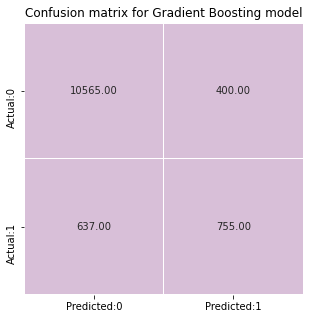

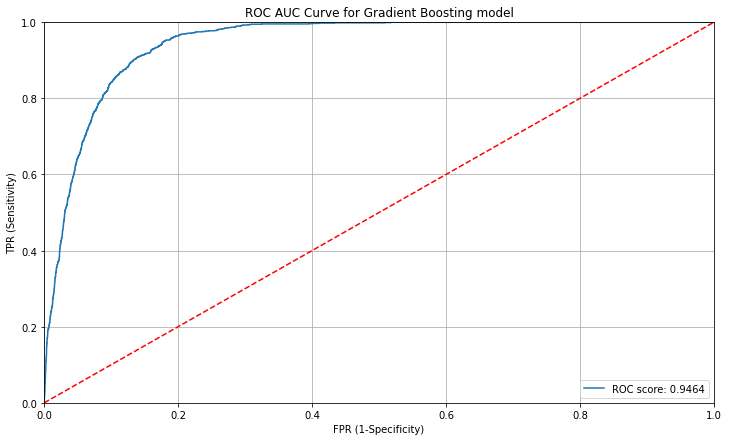

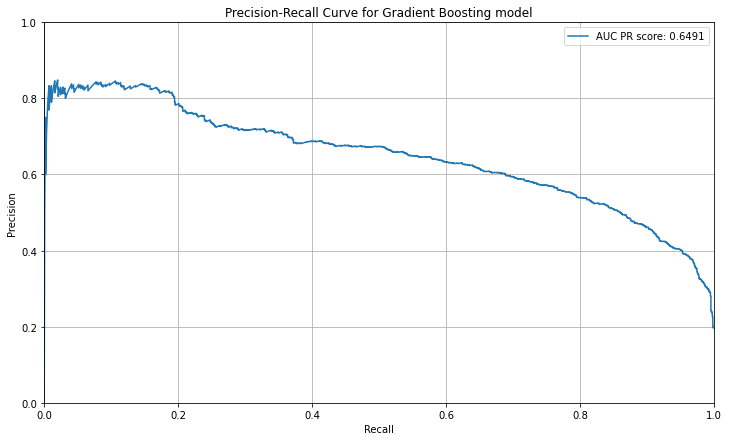

Classification report for Gradient Boosting model:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.65      0.54      0.59      1392

    accuracy                           0.92     12357
   macro avg       0.80      0.75      0.77     12357
weighted avg       0.91      0.92      0.91     12357



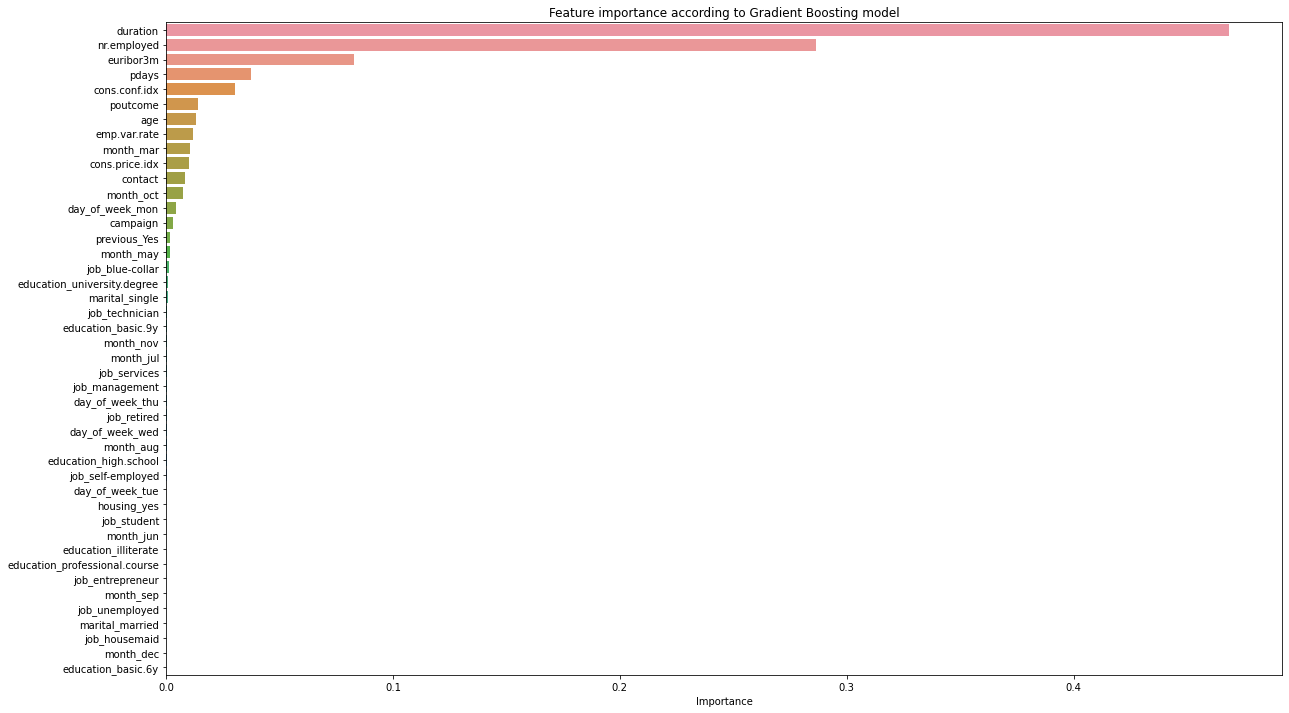

,model,train score,test score,precision,recall,f1_score,kappa score,auc-pr score,roc_score
0,Logistic Regression,0.912490,0.910011,0.899196,0.910011,0.901514,0.469321,0.585107,0.932169
1,K Nearest Neighbors,0.910513,0.899490,0.880753,0.899490,0.879838,0.319185,0.509423,0.852179
2,Decision tree,1.000000,0.885166,0.887591,0.885166,0.886340,0.437416,0.529910,0.723303
3,Random Forest,1.000000,0.911953,0.903759,0.911953,0.906351,0.505632,0.635642,0.941227
4,Gradient Boosting,0.923138,0.916080,0.910528,0.916080,0.912624,0.546524,0.649085,0.946422


In [8]:
# Gradient Boosting classifier
grad_boost = GradientBoostingClassifier()
grad_boost_model = grad_boost.fit(X_train, y_train)
plot_confusion_matrix('Gradient Boosting', grad_boost_model)
plot_roc_curve('Gradient Boosting', grad_boost_model)
plot_precision_recall_curve('Gradient Boosting', grad_boost_model)
plot_classification_report('Gradient Boosting', grad_boost_model)
plot_feature_importance('Gradient Boosting', grad_boost_model)
update_score_card('Gradient Boosting', grad_boost_model)

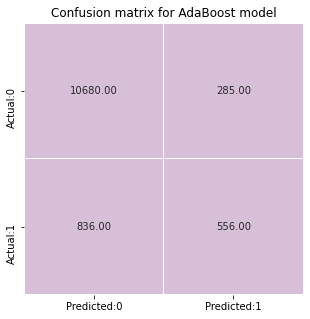

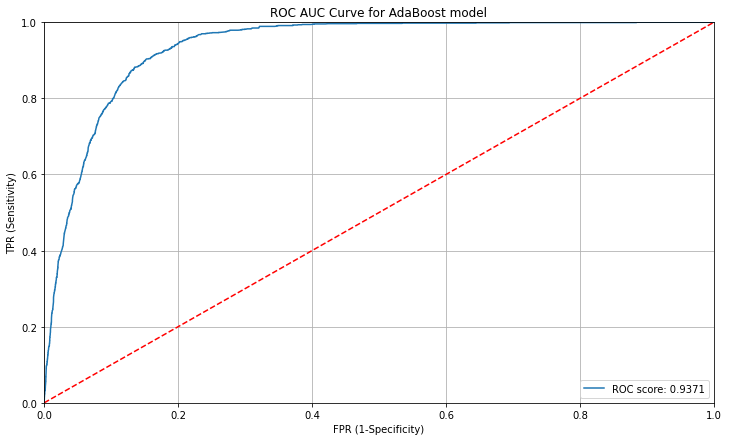

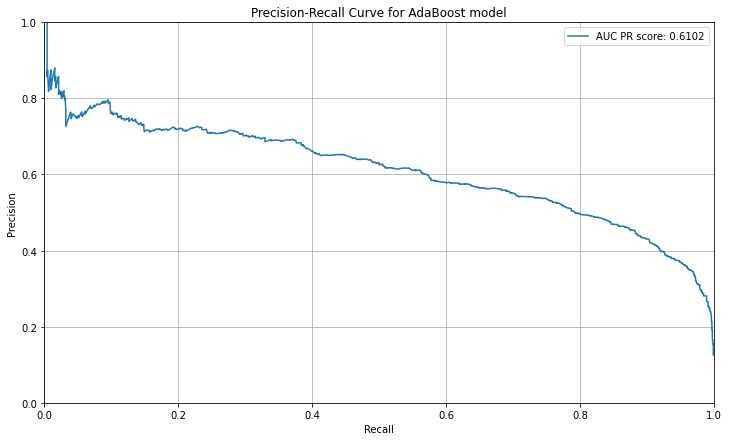

Classification report for AdaBoost model:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10965
           1       0.66      0.40      0.50      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.69      0.72     12357
weighted avg       0.90      0.91      0.90     12357



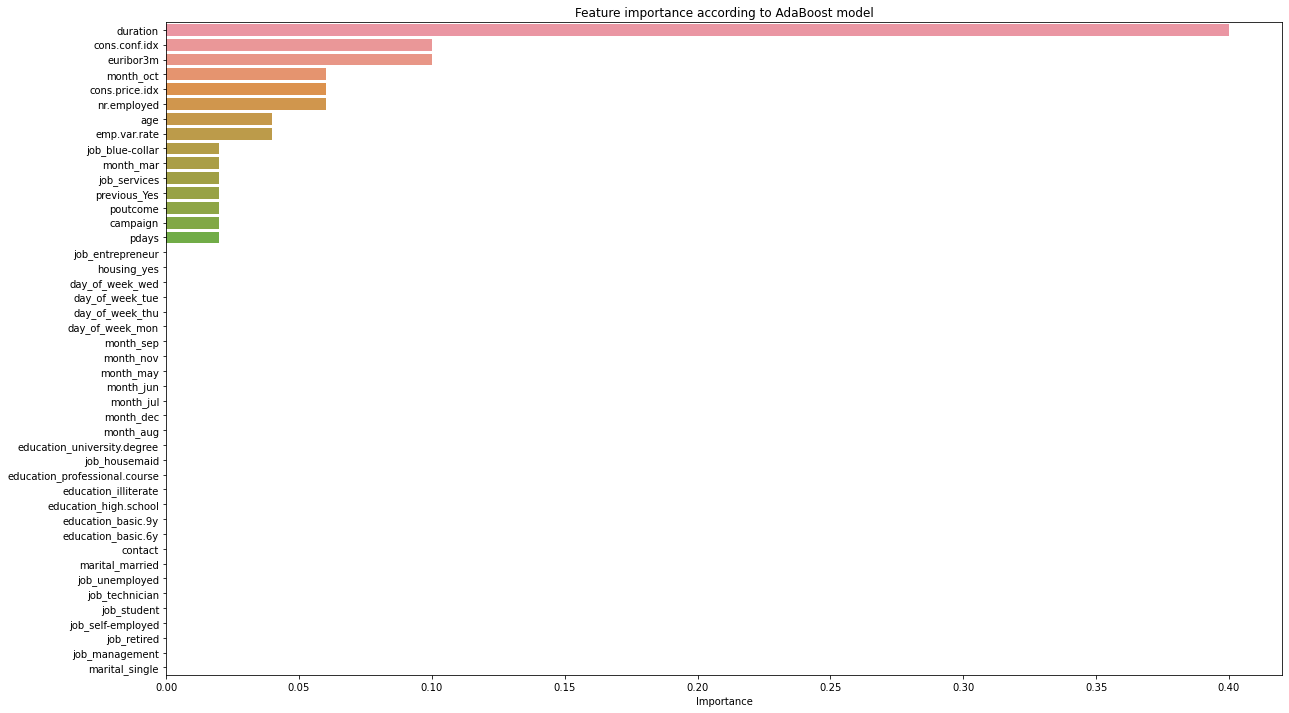

,model,train score,test score,precision,recall,f1_score,kappa score,auc-pr score,roc_score
0,Logistic Regression,0.912490,0.910011,0.899196,0.910011,0.901514,0.469321,0.585107,0.932169
1,K Nearest Neighbors,0.910513,0.899490,0.880753,0.899490,0.879838,0.319185,0.509423,0.852179
2,Decision tree,1.000000,0.885166,0.887591,0.885166,0.886340,0.437416,0.529910,0.723303
3,Random Forest,1.000000,0.911953,0.903759,0.911953,0.906351,0.505632,0.635642,0.941227
4,Gradient Boosting,0.923138,0.916080,0.910528,0.916080,0.912624,0.546524,0.649085,0.946422
5,AdaBoost,0.909507,0.909282,0.897408,0.909282,0.899201,0.451438,0.610231,0.937126


In [9]:
# Adaboost classifier
adaboost = AdaBoostClassifier()
adaboost_model = adaboost.fit(X_train, y_train)
plot_confusion_matrix('AdaBoost', adaboost_model)
plot_roc_curve('AdaBoost', adaboost_model)
plot_precision_recall_curve('AdaBoost', adaboost_model)
plot_classification_report('AdaBoost', adaboost_model)
plot_feature_importance('AdaBoost', adaboost_model)
update_score_card('AdaBoost', adaboost_model)

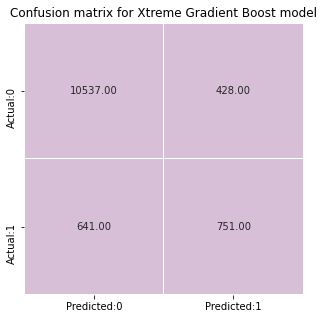

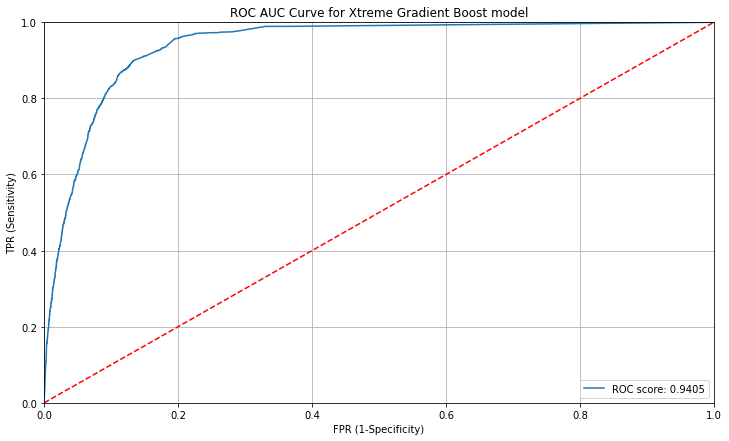

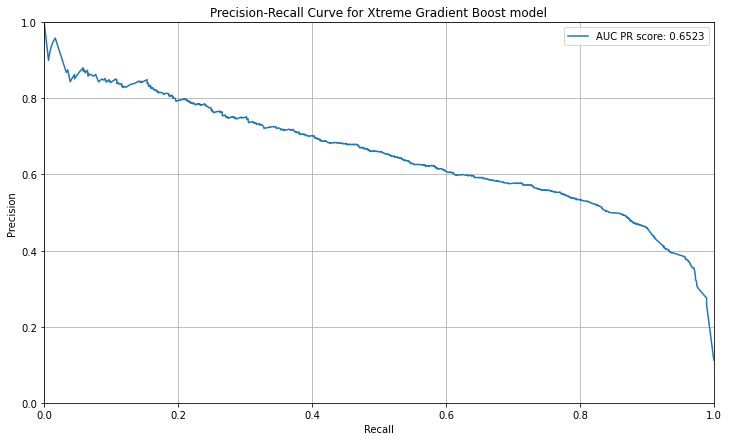

Classification report for Xtreme Gradient Boost model:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.64      0.54      0.58      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.75      0.77     12357
weighted avg       0.91      0.91      0.91     12357



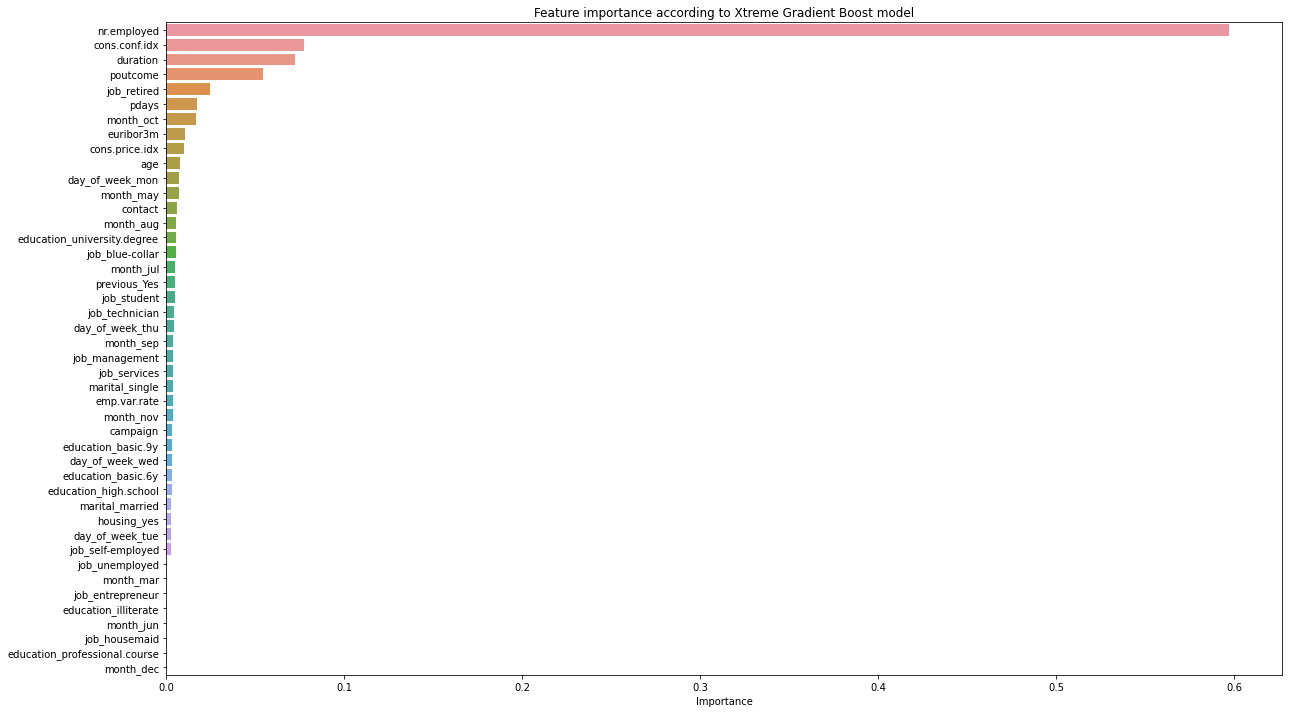

,model,train score,test score,precision,recall,f1_score,kappa score,auc-pr score,roc_score
0,Logistic Regression,0.912490,0.910011,0.899196,0.910011,0.901514,0.469321,0.585107,0.932169
1,K Nearest Neighbors,0.910513,0.899490,0.880753,0.899490,0.879838,0.319185,0.509423,0.852179
2,Decision tree,1.000000,0.885166,0.887591,0.885166,0.886340,0.437416,0.529910,0.723303
3,Random Forest,1.000000,0.911953,0.903759,0.911953,0.906351,0.505632,0.635642,0.941227
4,Gradient Boosting,0.923138,0.916080,0.910528,0.916080,0.912624,0.546524,0.649085,0.946422
5,AdaBoost,0.909507,0.909282,0.897408,0.909282,0.899201,0.451438,0.610231,0.937126
6,Xtreme Gradient Boost,0.923277,0.913490,0.908221,0.913490,0.910323,0.536301,0.652298,0.940512


In [10]:
# Xtreme Gradient Boost CLassifier
xgb_base = XGBClassifier(learning_rate = 0.01, gamma = 2, eval_metric = 'logloss')
xgb_model = xgb_base.fit(X_train, y_train)
plot_confusion_matrix('Xtreme Gradient Boost', xgb_model)
plot_roc_curve('Xtreme Gradient Boost', xgb_model)
plot_precision_recall_curve('Xtreme Gradient Boost', xgb_model)
plot_classification_report('Xtreme Gradient Boost', xgb_model)
plot_feature_importance('Xtreme Gradient Boost', xgb_model)
update_score_card('Xtreme Gradient Boost', xgb_model)

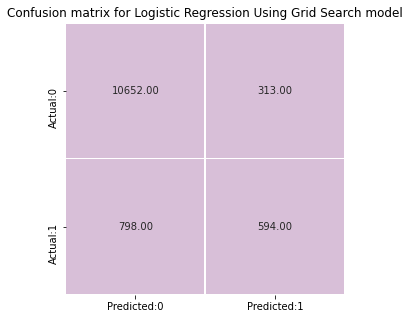

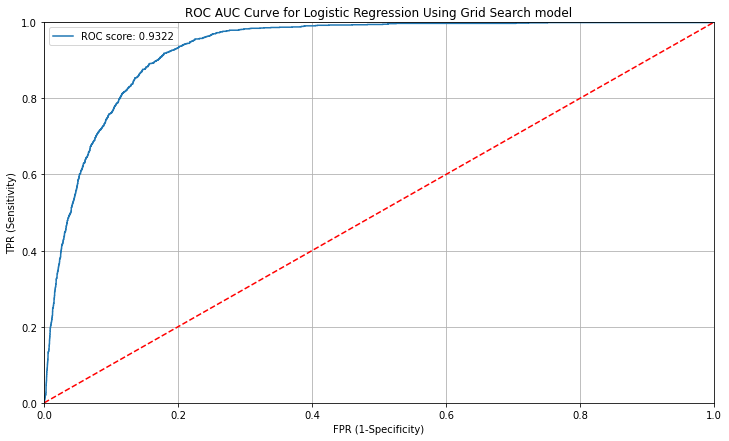

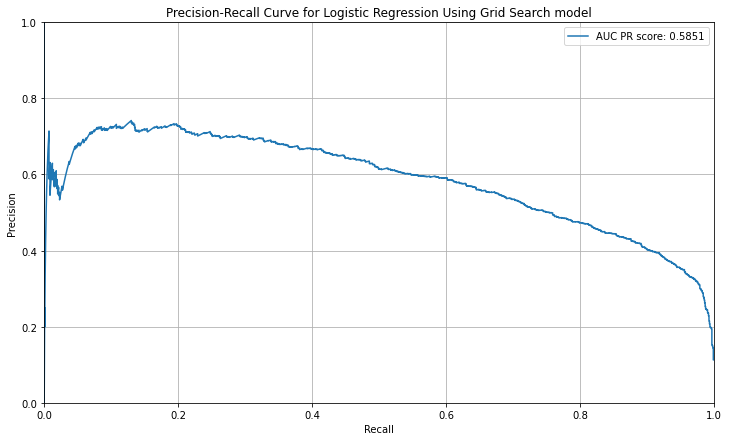

Classification report for Logistic Regression Using Grid Search model:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10965
           1       0.65      0.43      0.52      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.70      0.73     12357
weighted avg       0.90      0.91      0.90     12357



,model,train score,test score,precision,recall,f1_score,kappa score,auc-pr score,roc_score
0,Logistic Regression,0.912490,0.910011,0.899196,0.910011,0.901514,0.469321,0.585107,0.932169
1,K Nearest Neighbors,0.910513,0.899490,0.880753,0.899490,0.879838,0.319185,0.509423,0.852179
2,Decision tree,1.000000,0.885166,0.887591,0.885166,0.886340,0.437416,0.529910,0.723303
3,Random Forest,1.000000,0.911953,0.903759,0.911953,0.906351,0.505632,0.635642,0.941227
4,Gradient Boosting,0.923138,0.916080,0.910528,0.916080,0.912624,0.546524,0.649085,0.946422
5,AdaBoost,0.909507,0.909282,0.897408,0.909282,0.899201,0.451438,0.610231,0.937126
6,Xtreme Gradient Boost,0.923277,0.913490,0.908221,0.913490,0.910323,0.536301,0.652298,0.940512
7,Logistic Regression Using Grid Search,0.912455,0.910091,0.899282,0.910091,0.901581,0.469602,0.585086,0.932215


In [11]:
# Grid Search over Logistic Regression
params_grid = {'C': np.logspace(-4, 4, 50),\
    'penalty': ['l1', 'l2']}
    
logreg_grid = GridSearchCV(estimator = logreg, param_grid = params_grid, cv = 5,\
                           scoring = 'precision_weighted', n_jobs = 10)    

logreg_grid = logreg_grid.fit(X_train, y_train)
# Building Logistic Regression model using the best parameters obtained by grid search:
logreg_grid_model = LogisticRegression(C = logreg_grid.best_params_.get('C'),\
                                         penalty= logreg_grid.best_params_.get('penalty'))

logreg_grid_model = logreg_grid_model.fit(X_train, y_train)

plot_confusion_matrix('Logistic Regression Using Grid Search', logreg_grid_model)
plot_roc_curve('Logistic Regression Using Grid Search', logreg_grid_model)
plot_precision_recall_curve('Logistic Regression Using Grid Search', logreg_grid_model)
plot_classification_report('Logistic Regression Using Grid Search', logreg_grid_model)
# plot_feature_importance('Logistic Regression', logreg_model)
update_score_card('Logistic Regression Using Grid Search', logreg_grid_model)

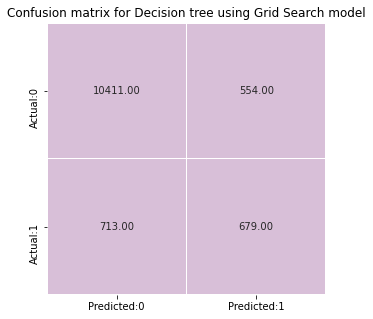

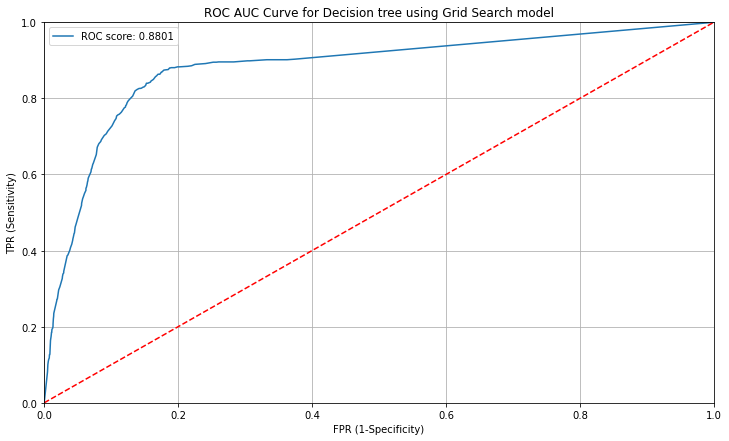

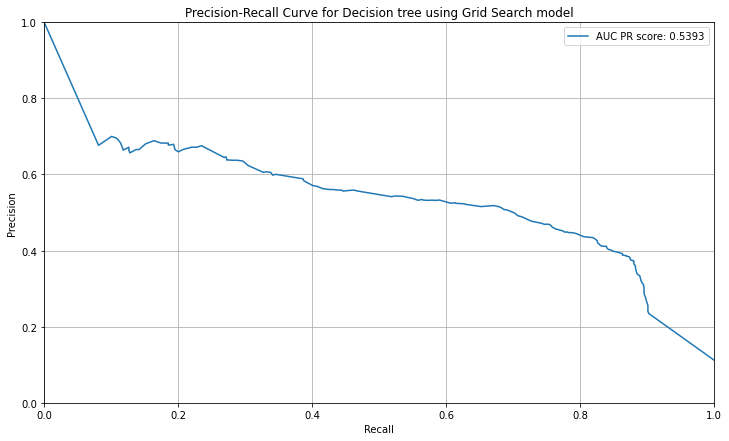

Classification report for Decision tree using Grid Search model:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     10965
           1       0.55      0.49      0.52      1392

    accuracy                           0.90     12357
   macro avg       0.74      0.72      0.73     12357
weighted avg       0.89      0.90      0.89     12357



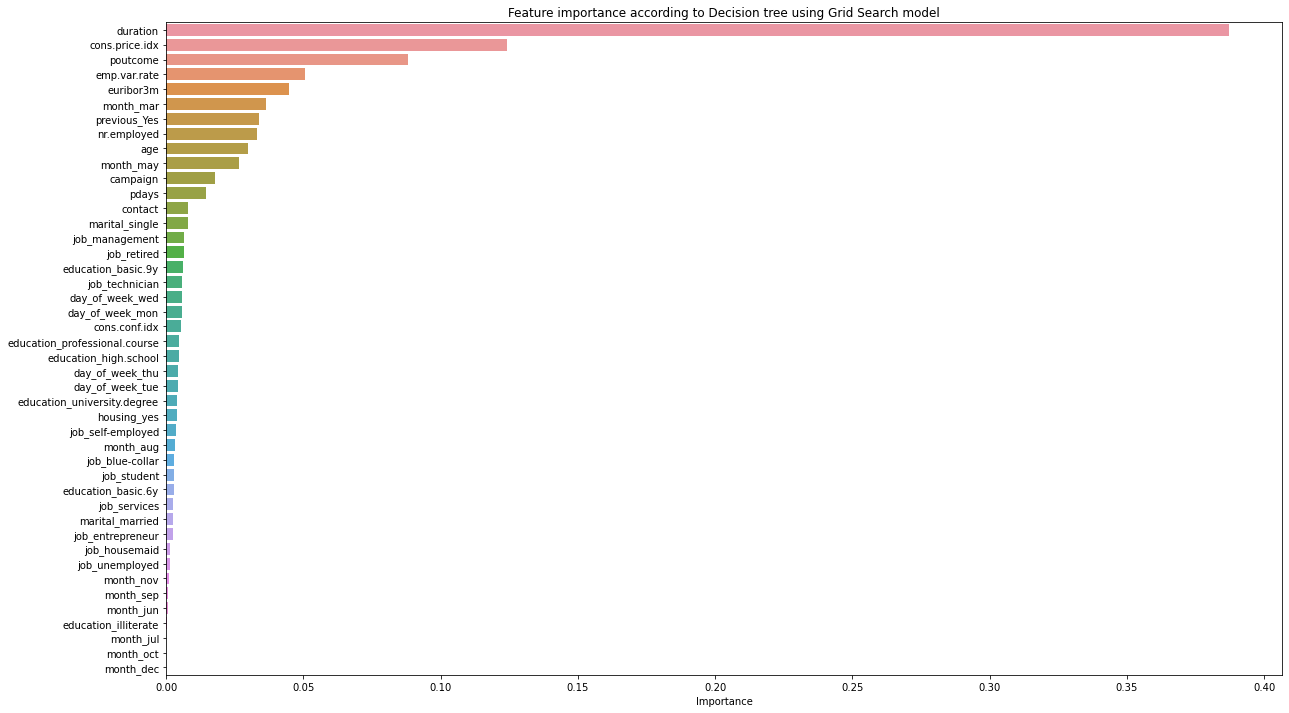

,model,train score,test score,precision,recall,f1_score,kappa score,auc-pr score,roc_score
0,Logistic Regression,0.912490,0.910011,0.899196,0.910011,0.901514,0.469321,0.585107,0.932169
1,K Nearest Neighbors,0.910513,0.899490,0.880753,0.899490,0.879838,0.319185,0.509423,0.852179
2,Decision tree,1.000000,0.885166,0.887591,0.885166,0.886340,0.437416,0.529910,0.723303
3,Random Forest,1.000000,0.911953,0.903759,0.911953,0.906351,0.505632,0.635642,0.941227
4,Gradient Boosting,0.923138,0.916080,0.910528,0.916080,0.912624,0.546524,0.649085,0.946422
5,AdaBoost,0.909507,0.909282,0.897408,0.909282,0.899201,0.451438,0.610231,0.937126
6,Xtreme Gradient Boost,0.923277,0.913490,0.908221,0.913490,0.910323,0.536301,0.652298,0.940512
7,Logistic Regression Using Grid Search,0.912455,0.910091,0.899282,0.910091,0.901581,0.469602,0.585086,0.932215
8,Decision tree using Grid Search,0.933093,0.897467,0.892510,0.897467,0.894731,0.460210,0.539292,0.880128


In [12]:
# GridSearch over DecisionTree
params_grid = {'criterion': ['gini', 'entropy'], \
              "max_features": ['sqrt', 'log2'],\
              "max_depth": range(2, 20),
              "min_samples_split": range(2, 20)}

tree_grid = GridSearchCV(estimator=dtree, param_grid=params_grid, cv = 5, scoring = 'precision_weighted', n_jobs=10)
tree_grid = tree_grid.fit(X_train, y_train)

# Building Decision tree using the best parameters obtained by grid search:
dtree_grid_model = DecisionTreeClassifier(criterion= tree_grid.best_params_.get('criterion'),\
                                         max_features= tree_grid.best_params_.get('max_features'),\
                                         max_depth= tree_grid.best_params_.get('max_depth'),\
                                         min_samples_split= tree_grid.best_params_.get('min_samples_split'))

dtree_grid_model = dtree_grid_model.fit(X_train, y_train)
plot_confusion_matrix('Decision tree using Grid Search', dtree_grid_model)
plot_roc_curve('Decision tree using Grid Search', dtree_grid_model)
plot_precision_recall_curve('Decision tree using Grid Search', dtree_grid_model)
plot_classification_report('Decision tree using Grid Search', dtree_grid_model)
plot_feature_importance('Decision tree using Grid Search', dtree_grid_model)
update_score_card('Decision tree using Grid Search', dtree_grid_model)

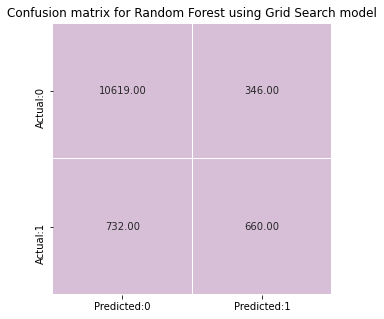

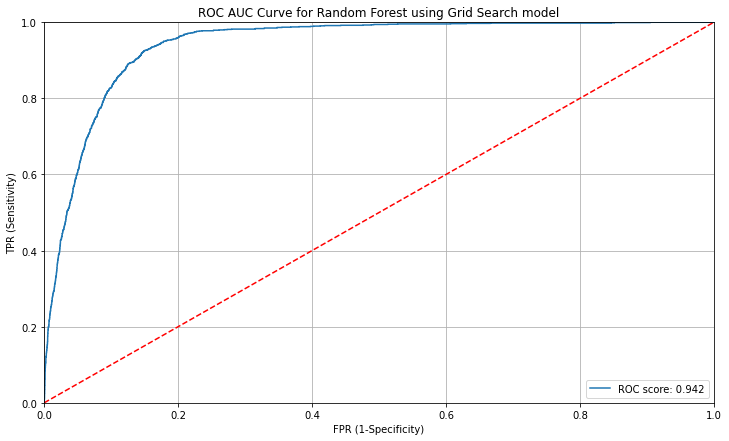

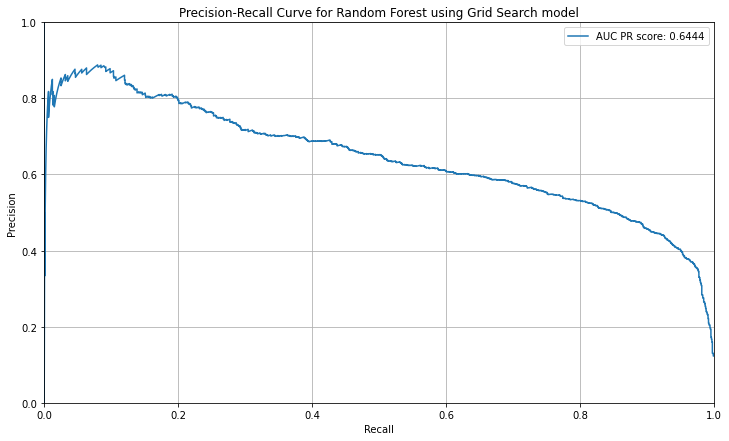

Classification report for Random Forest using Grid Search model:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10965
           1       0.66      0.47      0.55      1392

    accuracy                           0.91     12357
   macro avg       0.80      0.72      0.75     12357
weighted avg       0.90      0.91      0.91     12357



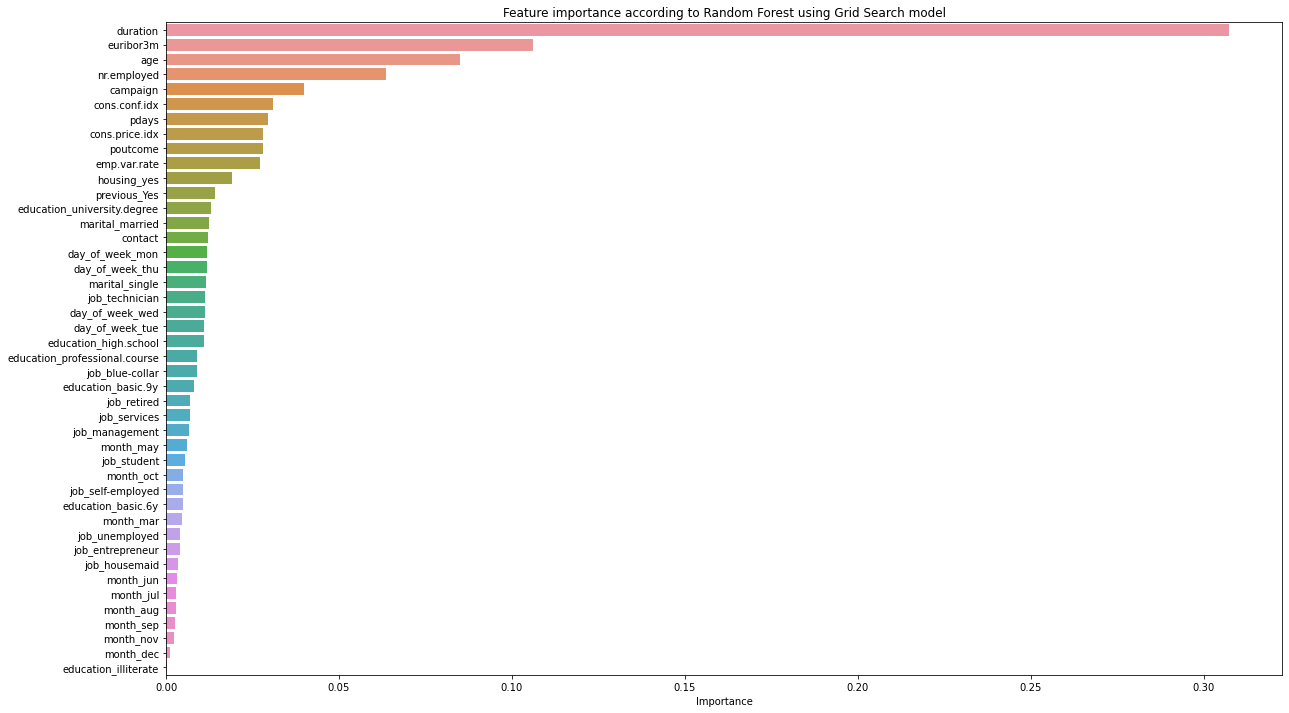

,model,train score,test score,precision,recall,f1_score,kappa score,auc-pr score,roc_score
0,Logistic Regression,0.912490,0.910011,0.899196,0.910011,0.901514,0.469321,0.585107,0.932169
1,K Nearest Neighbors,0.910513,0.899490,0.880753,0.899490,0.879838,0.319185,0.509423,0.852179
2,Decision tree,1.000000,0.885166,0.887591,0.885166,0.886340,0.437416,0.529910,0.723303
3,Random Forest,1.000000,0.911953,0.903759,0.911953,0.906351,0.505632,0.635642,0.941227
4,Gradient Boosting,0.923138,0.916080,0.910528,0.916080,0.912624,0.546524,0.649085,0.946422
5,AdaBoost,0.909507,0.909282,0.897408,0.909282,0.899201,0.451438,0.610231,0.937126
6,Xtreme Gradient Boost,0.923277,0.913490,0.908221,0.913490,0.910323,0.536301,0.652298,0.940512
7,Logistic Regression Using Grid Search,0.912455,0.910091,0.899282,0.910091,0.901581,0.469602,0.585086,0.932215
8,Decision tree using Grid Search,0.933093,0.897467,0.892510,0.897467,0.894731,0.460210,0.539292,0.880128
9,Random Forest using Grid Search,0.992231,0.912762,0.904033,0.912762,0.906495,0.503535,0.644422,0.942012


In [13]:
# GridSearch over RandomForest
rf_params_grid = {'n_estimators': [ 50 , 70 , 100], \
                'criterion': ['gini', 'entropy'], \
              "max_features": ['sqrt', 'log2'],\
                "max_depth": range(2, 20)}

rf_grid = GridSearchCV(estimator=random_forest, param_grid=rf_params_grid, cv = 5,\
                       scoring = 'precision_weighted', n_jobs=10)
rf_grid = rf_grid.fit(X_train, y_train)


# Building Random Forest classifier using the best parameters obtained by grid search:
rf_grid_model = RandomForestClassifier(n_estimators= rf_grid.best_params_.get('n_estimators'),\
                                        criterion= rf_grid.best_params_.get('criterion'),\
                                         max_features= rf_grid.best_params_.get('max_features'),\
                                         max_depth=  rf_grid.best_params_.get('max_depth'))

rf_grid_model = rf_grid_model.fit(X_train, y_train)

plot_confusion_matrix('Random Forest using Grid Search', rf_grid_model)
plot_roc_curve('Random Forest using Grid Search', rf_grid_model)
plot_precision_recall_curve('Random Forest using Grid Search', rf_grid_model)
plot_classification_report('Random Forest using Grid Search', rf_grid_model)
plot_feature_importance('Random Forest using Grid Search', rf_grid_model)
update_score_card('Random Forest using Grid Search', rf_grid_model)

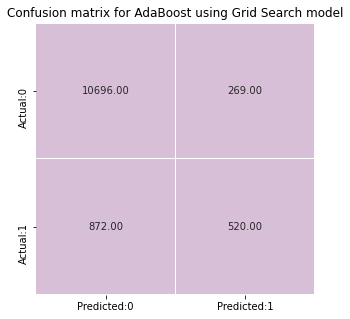

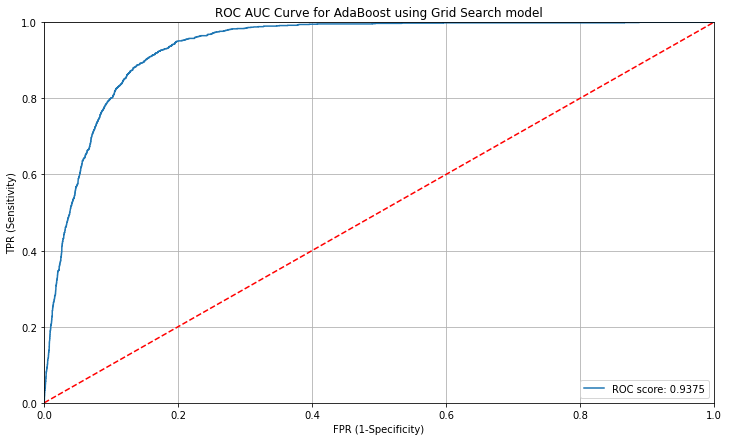

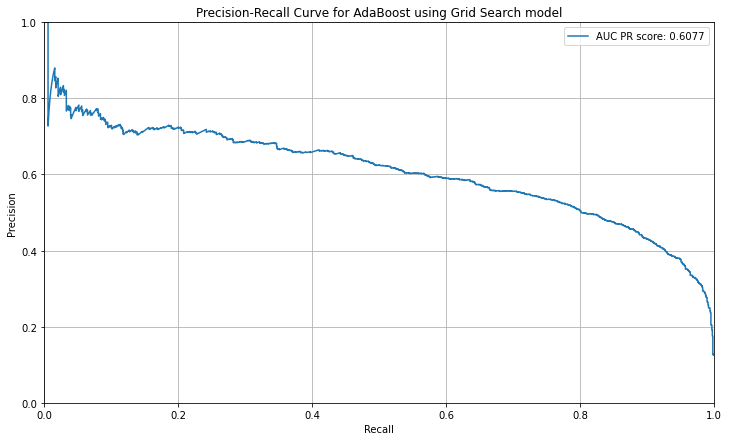

Classification report for AdaBoost using Grid Search model:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10965
           1       0.66      0.37      0.48      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.67      0.71     12357
weighted avg       0.89      0.91      0.90     12357



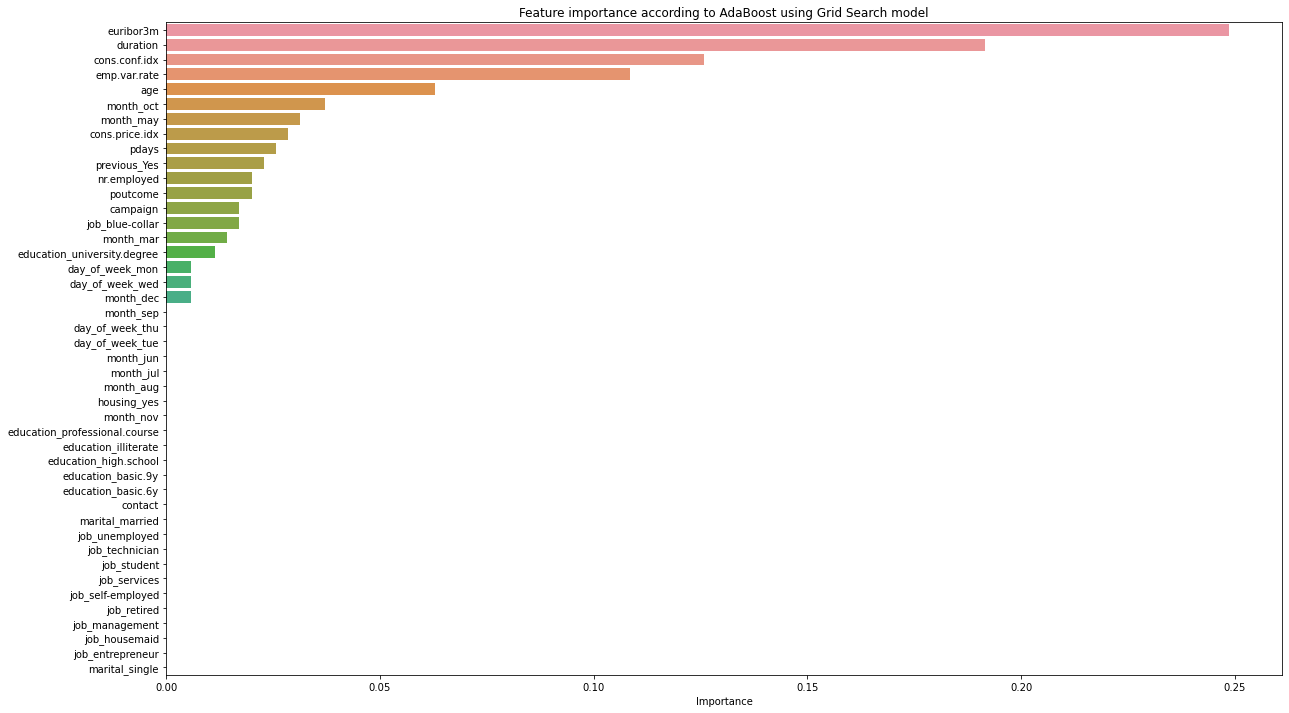

,model,train score,test score,precision,recall,f1_score,kappa score,auc-pr score,roc_score
0,Logistic Regression,0.912490,0.910011,0.899196,0.910011,0.901514,0.469321,0.585107,0.932169
1,K Nearest Neighbors,0.910513,0.899490,0.880753,0.899490,0.879838,0.319185,0.509423,0.852179
2,Decision tree,1.000000,0.885166,0.887591,0.885166,0.886340,0.437416,0.529910,0.723303
3,Random Forest,1.000000,0.911953,0.903759,0.911953,0.906351,0.505632,0.635642,0.941227
4,Gradient Boosting,0.923138,0.916080,0.910528,0.916080,0.912624,0.546524,0.649085,0.946422
5,AdaBoost,0.909507,0.909282,0.897408,0.909282,0.899201,0.451438,0.610231,0.937126
6,Xtreme Gradient Boost,0.923277,0.913490,0.908221,0.913490,0.910323,0.536301,0.652298,0.940512
7,Logistic Regression Using Grid Search,0.912455,0.910091,0.899282,0.910091,0.901581,0.469602,0.585086,0.932215
8,Decision tree using Grid Search,0.933093,0.897467,0.892510,0.897467,0.894731,0.460210,0.539292,0.880128
9,Random Forest using Grid Search,0.992231,0.912762,0.904033,0.912762,0.906495,0.503535,0.644422,0.942012


In [14]:
# Grid Search over Adaboost model:
params_grid = {"n_estimators" : [100, 120, 150, 200, 250, 300, 350],\
               "learning_rate" : [0.1, 0.01, 0.001, 0.15, 0.015] }

adamodel_grid = GridSearchCV(estimator=adaboost, param_grid=params_grid, cv = 5, scoring = 'precision_weighted', n_jobs=10)
adamodel_grid = adamodel_grid.fit(X_train, y_train)

adamodel_grid = AdaBoostClassifier(n_estimators = adamodel_grid.best_params_.get('n_estimators'),
                                  learning_rate = adamodel_grid.best_params_.get('learning_rate'))
adamodel_grid = adamodel_grid.fit(X_train, y_train)

plot_confusion_matrix('AdaBoost using Grid Search', adamodel_grid)
plot_roc_curve('AdaBoost using Grid Search', adamodel_grid)
plot_precision_recall_curve('AdaBoost using Grid Search', adamodel_grid)
plot_classification_report('AdaBoost using Grid Search', adamodel_grid)
plot_feature_importance('AdaBoost using Grid Search', adamodel_grid)
update_score_card('AdaBoost using Grid Search', adamodel_grid)

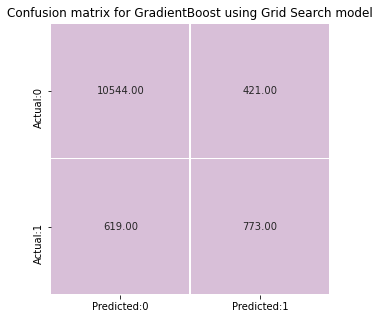

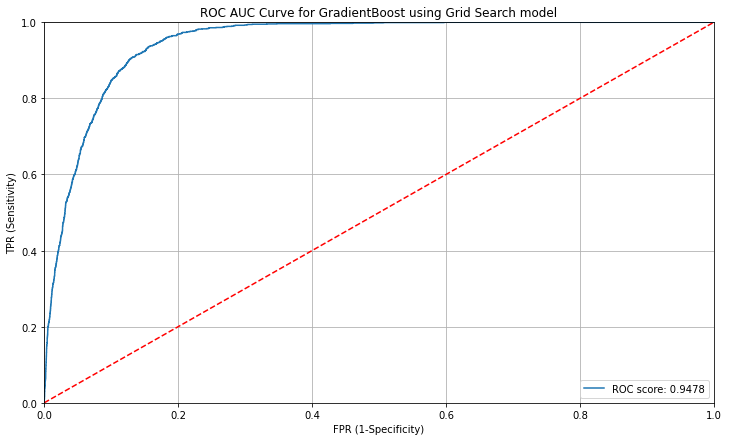

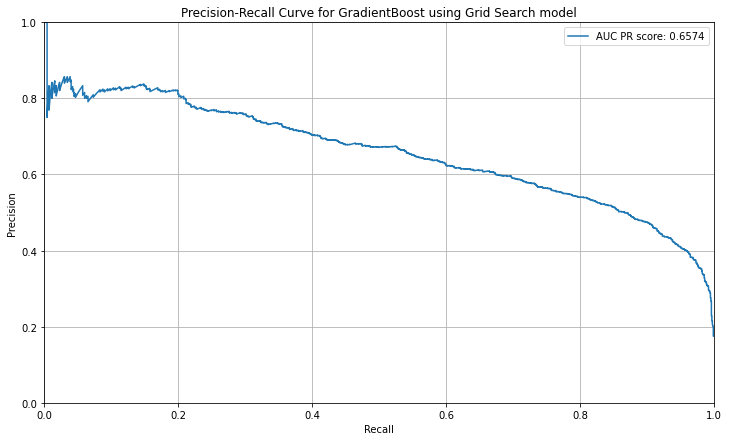

Classification report for GradientBoost using Grid Search model:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.65      0.56      0.60      1392

    accuracy                           0.92     12357
   macro avg       0.80      0.76      0.78     12357
weighted avg       0.91      0.92      0.91     12357



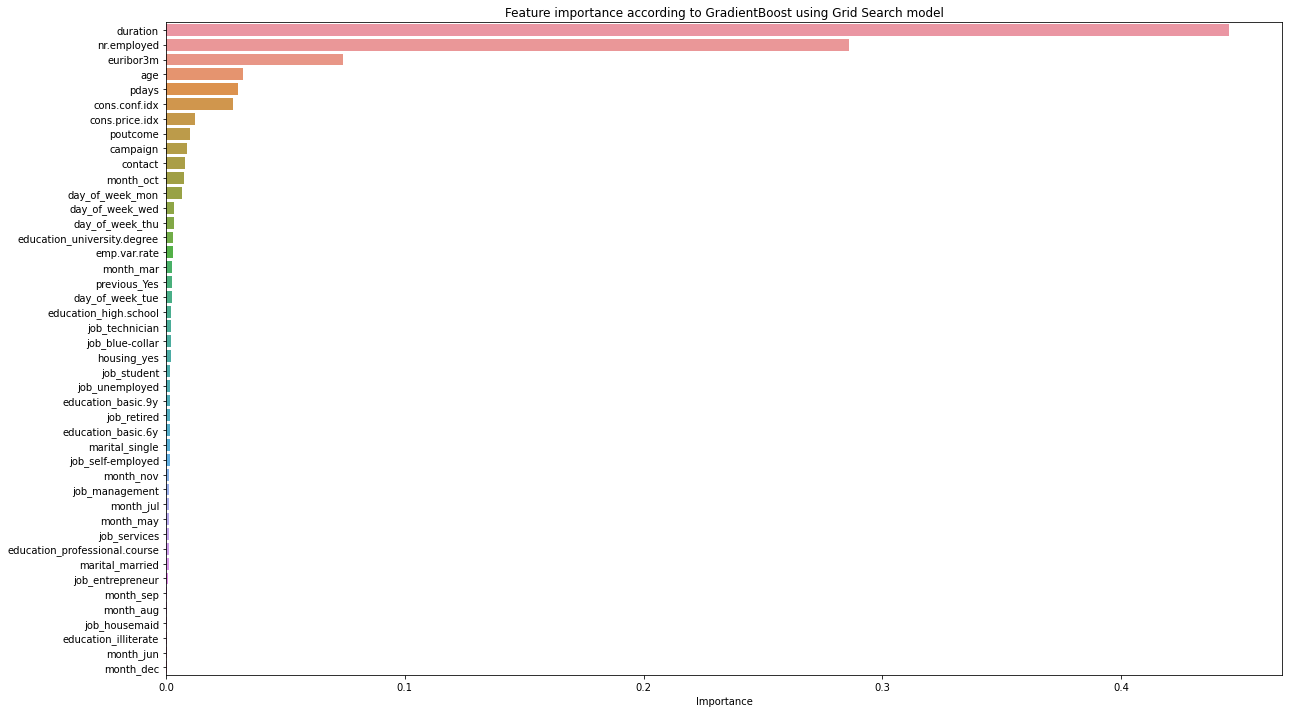

,model,train score,test score,precision,recall,f1_score,kappa score,auc-pr score,roc_score
0,Logistic Regression,0.912490,0.910011,0.899196,0.910011,0.901514,0.469321,0.585107,0.932169
1,K Nearest Neighbors,0.910513,0.899490,0.880753,0.899490,0.879838,0.319185,0.509423,0.852179
2,Decision tree,1.000000,0.885166,0.887591,0.885166,0.886340,0.437416,0.529910,0.723303
3,Random Forest,1.000000,0.911953,0.903759,0.911953,0.906351,0.505632,0.635642,0.941227
4,Gradient Boosting,0.923138,0.916080,0.910528,0.916080,0.912624,0.546524,0.649085,0.946422
5,AdaBoost,0.909507,0.909282,0.897408,0.909282,0.899201,0.451438,0.610231,0.937126
6,Xtreme Gradient Boost,0.923277,0.913490,0.908221,0.913490,0.910323,0.536301,0.652298,0.940512
7,Logistic Regression Using Grid Search,0.912455,0.910091,0.899282,0.910091,0.901581,0.469602,0.585086,0.932215
8,Decision tree using Grid Search,0.933093,0.897467,0.892510,0.897467,0.894731,0.460210,0.539292,0.880128
9,Random Forest using Grid Search,0.992231,0.912762,0.904033,0.912762,0.906495,0.503535,0.644422,0.942012


In [15]:
# Grid Search over Gradient Boosting model:
params_grid = { "n_estimators" : [100, 120, 150, 200, 250, 300, 350],\
                "learning_rate" : [0.1, 0.01, 0.001, 0.15, 0.015], \
                "max_depth" : [2, 3, 4, 5, 6]}

gradboost_grid = GridSearchCV(estimator=grad_boost, param_grid=params_grid, cv = 5,\
                              scoring = 'precision_weighted', n_jobs=10)
gradboost_grid = gradboost_grid.fit(X_train, y_train)

gradboost_grid = GradientBoostingClassifier(n_estimators = gradboost_grid.best_params_.get('n_estimators'),
                                  learning_rate = gradboost_grid.best_params_.get('learning_rate'),
                                  max_depth = gradboost_grid.best_params_.get('max_depth'))

gradboost_grid = gradboost_grid.fit(X_train, y_train)

plot_confusion_matrix('GradientBoost using Grid Search', gradboost_grid)
plot_roc_curve('GradientBoost using Grid Search', gradboost_grid)
plot_precision_recall_curve('GradientBoost using Grid Search', gradboost_grid)
plot_classification_report('GradientBoost using Grid Search', gradboost_grid)
plot_feature_importance('GradientBoost using Grid Search', gradboost_grid)
update_score_card('GradientBoost using Grid Search', gradboost_grid)

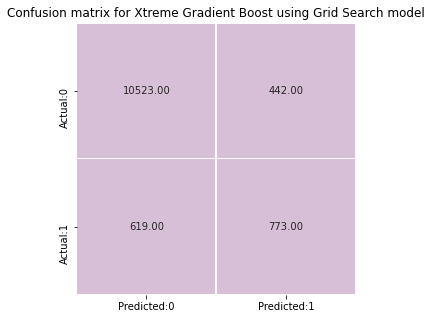

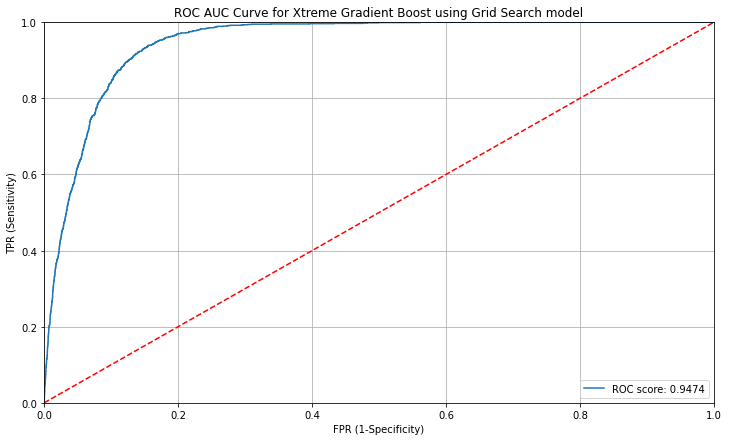

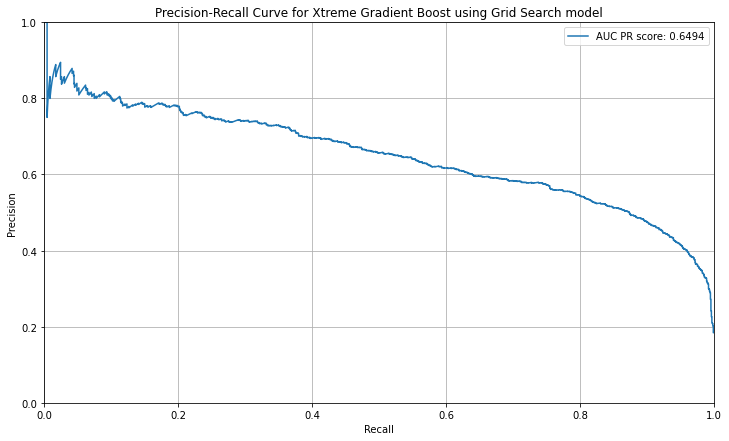

Classification report for Xtreme Gradient Boost using Grid Search model:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.64      0.56      0.59      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.76      0.77     12357
weighted avg       0.91      0.91      0.91     12357



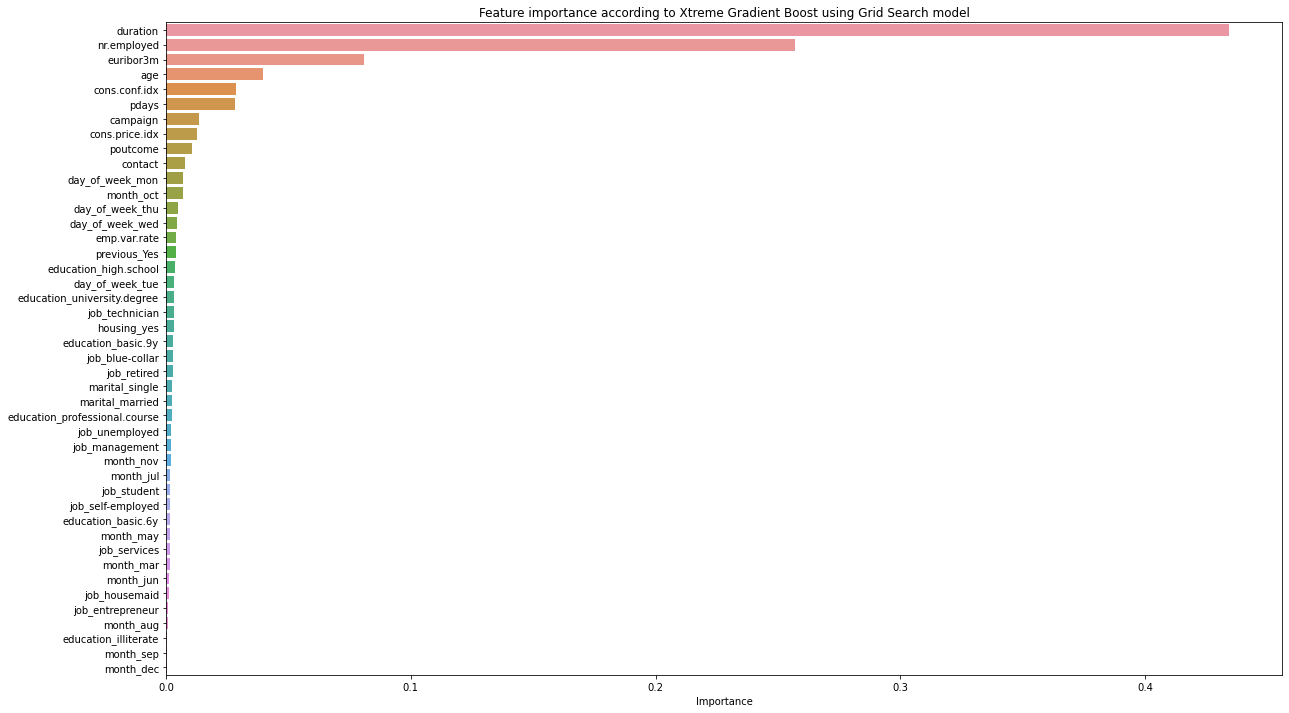

,model,train score,test score,precision,recall,f1_score,kappa score,auc-pr score,roc_score
0,Logistic Regression,0.912490,0.910011,0.899196,0.910011,0.901514,0.469321,0.585107,0.932169
1,K Nearest Neighbors,0.910513,0.899490,0.880753,0.899490,0.879838,0.319185,0.509423,0.852179
2,Decision tree,1.000000,0.885166,0.887591,0.885166,0.886340,0.437416,0.529910,0.723303
3,Random Forest,1.000000,0.911953,0.903759,0.911953,0.906351,0.505632,0.635642,0.941227
4,Gradient Boosting,0.923138,0.916080,0.910528,0.916080,0.912624,0.546524,0.649085,0.946422
5,AdaBoost,0.909507,0.909282,0.897408,0.909282,0.899201,0.451438,0.610231,0.937126
6,Xtreme Gradient Boost,0.923277,0.913490,0.908221,0.913490,0.910323,0.536301,0.652298,0.940512
7,Logistic Regression Using Grid Search,0.912455,0.910091,0.899282,0.910091,0.901581,0.469602,0.585086,0.932215
8,Decision tree using Grid Search,0.933093,0.897467,0.892510,0.897467,0.894731,0.460210,0.539292,0.880128
9,Random Forest using Grid Search,0.992231,0.912762,0.904033,0.912762,0.906495,0.503535,0.644422,0.942012


In [16]:
# Grid Search over Xtreme Gradient Boosting model:
params_grid = {"n_estimators" : [100, 120, 150],\
                "learning_rate" : [0.1, 0.01, 0.001, 0.15, 0.015], \
                "max_depth" : [2, 3, 4, 5, 6]}

xgb_grid = GridSearchCV(estimator=xgb_base, param_grid=params_grid, cv = 5, scoring = 'precision_weighted', n_jobs=10)
xgb_grid = xgb_grid.fit(X_train, y_train)

xgb_grid_model = GradientBoostingClassifier(n_estimators = xgb_grid.best_params_.get('n_estimators'),
                                  learning_rate = xgb_grid.best_params_.get('learning_rate'),
                                  max_depth = xgb_grid.best_params_.get('max_depth'))

xgb_grid_model = xgb_grid_model.fit(X_train, y_train)

plot_confusion_matrix('Xtreme Gradient Boost using Grid Search', xgb_grid_model)
plot_roc_curve('Xtreme Gradient Boost using Grid Search', xgb_grid_model)
plot_precision_recall_curve('Xtreme Gradient Boost using Grid Search', xgb_grid_model)
plot_classification_report('Xtreme Gradient Boost using Grid Search', xgb_grid_model)
plot_feature_importance('Xtreme Gradient Boost using Grid Search', xgb_grid_model)
update_score_card('Xtreme Gradient Boost using Grid Search', xgb_grid_model)

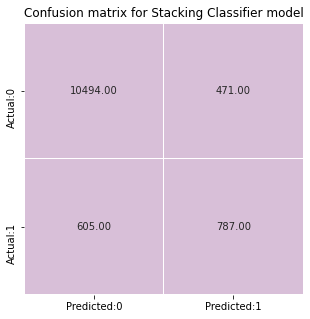

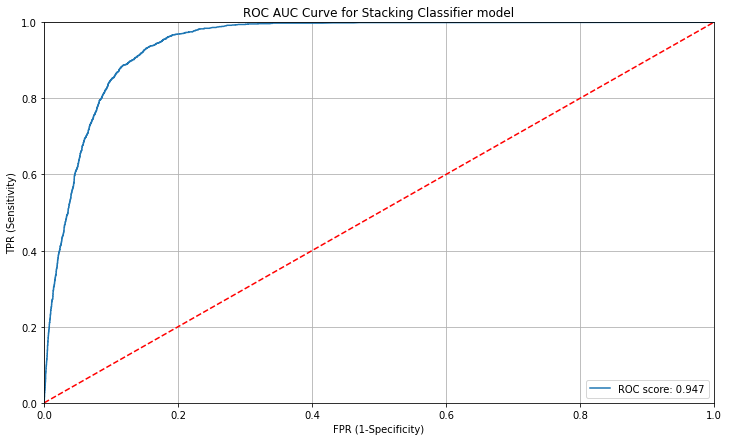

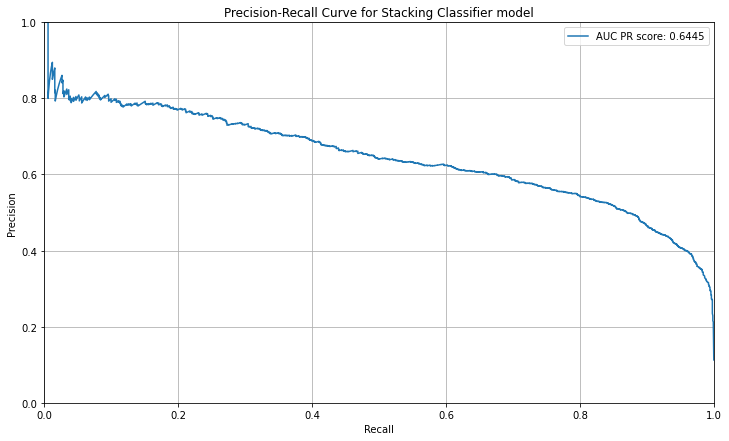

Classification report for Stacking Classifier model:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     10965
           1       0.63      0.57      0.59      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.76      0.77     12357
weighted avg       0.91      0.91      0.91     12357



,model,train score,test score,precision,recall,f1_score,kappa score,auc-pr score,roc_score
0,Logistic Regression,0.912490,0.910011,0.899196,0.910011,0.901514,0.469321,0.585107,0.932169
1,K Nearest Neighbors,0.910513,0.899490,0.880753,0.899490,0.879838,0.319185,0.509423,0.852179
2,Decision tree,1.000000,0.885166,0.887591,0.885166,0.886340,0.437416,0.529910,0.723303
3,Random Forest,1.000000,0.911953,0.903759,0.911953,0.906351,0.505632,0.635642,0.941227
4,Gradient Boosting,0.923138,0.916080,0.910528,0.916080,0.912624,0.546524,0.649085,0.946422
5,AdaBoost,0.909507,0.909282,0.897408,0.909282,0.899201,0.451438,0.610231,0.937126
6,Xtreme Gradient Boost,0.923277,0.913490,0.908221,0.913490,0.910323,0.536301,0.652298,0.940512
7,Logistic Regression Using Grid Search,0.912455,0.910091,0.899282,0.910091,0.901581,0.469602,0.585086,0.932215
8,Decision tree using Grid Search,0.933093,0.897467,0.892510,0.897467,0.894731,0.460210,0.539292,0.880128
9,Random Forest using Grid Search,0.992231,0.912762,0.904033,0.912762,0.906495,0.503535,0.644422,0.942012


In [17]:
# Stacking Classifier
base_learners = [('logreg_grid', logreg_grid_model),\
                ("dt_model", dtree_grid_model),\
                ('rf_model', rf_grid_model),\
                ('xgb_grid_model', xgb_grid_model),\
                ('adamodel', adamodel_grid)]

stack_model = StackingClassifier(estimators= base_learners, final_estimator= gradboost_grid)
stack_model = stack_model.fit(X_train, y_train)

plot_confusion_matrix('Stacking Classifier', stack_model)
plot_roc_curve('Stacking Classifier', stack_model)
plot_precision_recall_curve('Stacking Classifier', stack_model)
plot_classification_report('Stacking Classifier', stack_model)
# permutation_importance(stack_model, X_train, y_train, scoring='precision')
update_score_card('Stacking Classifier', stack_model)